In [1]:
import pandas as pd
import numpy as np

# predicting every stock 505 (in dense deeplearaning model)
# feature 
    # technical feature 
    # Joint distribution of returns of every stock 

# read data

In [4]:
monthly_data = pd.read_csv('monthlyReturnSpxConstituents.tsv', sep='\t')

In [5]:
monthly_data

,ticker,date,adjClose
0,AAPL,2015-12-31,24.340528
1,AAPL,2016-01-29,22.509092
2,AAPL,2016-02-29,22.479143
3,AAPL,2016-03-31,25.338729
4,AAPL,2016-04-29,21.793307
...,...,...,...
31254,NWS,2020-10-30,13.020000
31255,NWS,2020-11-30,17.810000
31256,NWS,2020-12-31,17.770000
31257,NWS,2021-01-29,18.880000


In [7]:
ticker_list = monthly_data['ticker'].unique()

In [8]:
monthly_data[monthly_data['ticker']==ticker_list[0] ]

,ticker,date,adjClose
0,AAPL,2015-12-31,24.340528
1,AAPL,2016-01-29,22.509092
2,AAPL,2016-02-29,22.479143
3,AAPL,2016-03-31,25.338729
4,AAPL,2016-04-29,21.793307
...,...,...,...
58,AAPL,2020-10-30,108.509649
59,AAPL,2020-11-30,118.871814
60,AAPL,2020-12-31,132.491399
61,AAPL,2021-01-29,131.762491


In [14]:
monthly_data_wyear = monthly_data.copy()
monthly_data_wyear['date_dt']  = pd.to_datetime(monthly_data_wyear['date'])

monthly_data_wyear['year'] = monthly_data_wyear['date_dt'].dt.year

monthly_data_wyear 

,ticker,date,adjClose,date_dt,year
0,AAPL,2015-12-31,24.340528,2015-12-31,2015
1,AAPL,2016-01-29,22.509092,2016-01-29,2016
2,AAPL,2016-02-29,22.479143,2016-02-29,2016
3,AAPL,2016-03-31,25.338729,2016-03-31,2016
4,AAPL,2016-04-29,21.793307,2016-04-29,2016
...,...,...,...,...,...
31254,NWS,2020-10-30,13.020000,2020-10-30,2020
31255,NWS,2020-11-30,17.810000,2020-11-30,2020
31256,NWS,2020-12-31,17.770000,2020-12-31,2020
31257,NWS,2021-01-29,18.880000,2021-01-29,2021


# Function for technical indicator

In [30]:
# train_test 

# Create feature


def SMA(data, period=30 , column= "Adj_Close_AAPL"):
    return data[column].rolling(window=period).mean()

# ema
def EMA(data,period = 20, column="Adj_Close_AAPL"):
    return data[column].ewm(span = period, adjust = False ).mean()



# create macd 
def MACD(data ,period_long = 6, period_short = 3, period_signal = 4 , column = "Adj_Close_AAPL"):
    # short term ema 
    Short_EMA = EMA(data, period_short,column = column)
    # long ema
    LongEMA = EMA(data, period_long,column=column)
    # calculate the macd
    data['MACD'] = Short_EMA - LongEMA
    # calculate signal line
    data['Signal_Line'] = EMA(data , period_signal,column = 'MACD')
    
    return data



# create rsi 
def RSI(data, period = 14 , column = "Adj_Close_AAPL"):
    delta = data[column].diff(1)
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up <0 ] = 0
    down[down>0] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = SMA(data , period,column="up")
    AVG_Loss = abs(SMA(data, period,column = "down"))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0-(100.0/1.0+ RS)
    
    data['RSI'] = RSI
    
    return data





# Compute the Bollinger Bands 
def BBANDS(data, n=14 , column = "Adj_Close_AAPL"):
    MA = data[column].rolling(window=n).mean()
    SD = data[column].rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data



def CCI(data, ndays= 14, close_col = "Close_AAPL"   , high_col = 'High_AAPL', low_col =  'Low_AAPL'): 
    TP = (data[high_col] + data[low_col] + data[close_col]) / 3 
    CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std()),
                    name = 'CCI') 
    data = data.join(CCI) 
    return data


def ROC(data,n=14 , Close_col = "Adj_Close_AAPL" ):
 N = data[Close_col].diff(n)
 D = data[Close_col].shift(n)
 ROC = pd.Series(N/D,name='Rate_of_Change')
 data = data.join(ROC)
 return data 

def ForceIndex(data, ndays=10 , Close_col = "Adj_Close_AAPL" , Volume_col = "Volume_AAPL"): 
    FI = pd.Series(data[Close_col].diff(ndays) * data[Volume_col], name = 'ForceIndex') 
    data = data.join(FI) 
    return data

# Stock name to column

In [34]:
df_for_technical = monthly_data_wyear.pivot(index="date", columns="ticker", values="adjClose")

In [27]:
df_for_technical

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,39.954379,40.468626,148.291873,24.340528,46.938516,94.594592,90.28,40.568093,95.520570,93.94,...,42.638359,60.486452,58.749585,24.553715,34.134629,47.325612,98.546427,69.65,24.424974,46.271496
2016-01-29,35.979009,37.257892,149.809177,22.509092,43.984203,81.688281,85.33,34.411350,96.471206,89.13,...,45.634028,60.408856,56.857241,22.521047,33.620272,47.197503,95.347679,60.40,20.291517,41.660464
2016-02-29,35.692324,39.288806,146.252379,22.479143,43.751863,79.316553,80.01,35.220494,91.644903,85.15,...,43.146715,62.760524,58.855788,22.197667,35.132124,47.262720,92.994245,61.78,19.127531,39.734696
2016-03-31,38.081368,39.298388,158.036633,25.338729,45.762799,79.252456,94.81,38.029769,105.483960,93.80,...,43.338600,65.454176,59.578371,25.962404,38.409619,53.380070,102.659452,69.00,21.720334,42.899149
2016-04-29,39.215438,33.242163,153.857543,21.793307,49.343003,77.924714,97.14,35.578072,104.204697,94.22,...,39.363839,69.220591,57.615948,22.333251,39.236037,52.177142,111.459109,62.56,24.689946,45.606300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-30,101.923335,11.280000,147.050720,108.509649,84.120367,95.279561,251.88,104.681911,216.170037,447.10,...,118.344997,31.329480,47.098741,17.192230,86.632658,92.484162,131.887919,283.64,31.777605,158.306556
2020-11-30,116.709157,14.130000,147.470067,118.871814,103.376121,102.677797,274.10,107.779245,248.240259,478.47,...,145.550000,37.485862,50.791586,21.653505,95.697109,105.300849,148.880594,378.42,38.332632,160.133746
2020-12-31,118.296562,15.770000,157.510000,132.491399,105.916537,97.350222,324.20,109.044073,260.318913,500.12,...,141.770000,40.523662,52.360000,23.190000,101.500560,108.047828,154.090000,384.33,43.150286,165.245885


# ticker column

In [35]:
for i in ticker_list:
        #     adj_close_name = "Adj_Close_{qa}".format(qa = i)
    adj_close_name = "{qa}".format(qa = i)
    close_name = "Close_{qa}".format(qa = i)
    high_name = "High_{qa}".format(qa = i)
    low_name = "Adj_Close_{qa}".format(qa = i)
    
    df_for_technical["MACD_{qa}".format(qa = i)] = MACD(df_for_technical, column= adj_close_name)["MACD"]
    df_for_technical["Signal_line_{qa}".format(qa = i)] = MACD(df_for_technical, column= adj_close_name)["Signal_Line"]
    
    df_for_technical["EMA_3_{qa}".format(qa = i)] = EMA(df_for_technical, column= adj_close_name, period=3)
    df_for_technical["EMA_6_{qa}".format(qa = i)] = EMA(df_for_technical, column= adj_close_name, period=6)


    df_for_technical["UpperBB_3_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 3)["UpperBB"]
    df_for_technical["LowerBB_3_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 3)["LowerBB"]
    df_for_technical["RSI_3_{qa}".format(qa = i)] = RSI(df_for_technical, column =  adj_close_name,  period = 3)["RSI"]
    
    
    
    
    
    df_for_technical["UpperBB_6_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 6)["UpperBB"]
    df_for_technical["LowerBB_6_{qa}".format(qa = i)] = BBANDS(df_for_technical ,column =  adj_close_name, n = 6)["LowerBB"]
    df_for_technical["RSI_6_{qa}".format(qa = i)] = RSI(df_for_technical, column =  adj_close_name,  period = 6)["RSI"]
    


In [36]:
df_for_technical

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,MACD_NWS,Signal_line_NWS,EMA_3_NWS,EMA_6_NWS,UpperBB_3_NWS,LowerBB_3_NWS,RSI_3_NWS,UpperBB_6_NWS,LowerBB_6_NWS,RSI_6_NWS
date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,39.954379,40.468626,148.291873,24.340528,46.938516,94.594592,90.28,40.568093,95.520570,93.94,...,0.000000,0.000000,12.963439,12.963439,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29,35.979009,37.257892,149.809177,22.509092,43.984203,81.688281,85.33,34.411350,96.471206,89.13,...,-0.085826,-0.017165,12.680212,12.801595,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-29,35.692324,39.288806,146.252379,22.479143,43.751863,79.316553,80.01,35.220494,91.644903,85.15,...,-0.400395,-0.093811,11.637844,12.171275,14.458295,9.512305,NaN,NaN,NaN,NaN
2016-03-31,38.081368,39.298388,158.036633,25.338729,45.762799,79.252456,94.81,38.029769,105.483960,93.80,...,-0.273225,-0.129694,12.022466,12.238650,13.885910,9.713789,-0.765050,NaN,NaN,NaN
2016-04-29,39.215438,33.242163,153.857543,21.793307,49.343003,77.924714,97.14,35.578072,104.204697,94.22,...,-0.228445,-0.149444,12.079001,12.209189,13.666749,9.758651,-0.873882,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-30,101.923335,11.280000,147.050720,108.509649,84.120367,95.279561,251.88,104.681911,216.170037,447.10,...,0.289110,0.014886,13.395155,13.131246,15.942347,12.038784,-1.175865,15.451829,10.781683,-2.268620
2020-11-30,116.709157,14.130000,147.470067,118.871814,103.376121,102.677797,274.10,107.779245,248.240259,478.47,...,0.931935,0.198296,15.602578,14.468033,20.005171,9.868163,-2.454276,18.314852,9.795318,-3.491498
2020-12-31,118.296562,15.770000,157.510000,132.491399,105.916537,97.350222,324.20,109.044073,260.318913,500.12,...,1.220025,0.402642,16.686289,15.411452,21.708067,10.691933,-4.790000,19.591697,10.484456,-3.961271


In [94]:
df_for_technical_fill = df_for_technical.fillna(method = 'bfill')

In [95]:
df_for_technical_fill

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,MACD_NWS,Signal_line_NWS,EMA_3_NWS,EMA_6_NWS,UpperBB_3_NWS,LowerBB_3_NWS,RSI_3_NWS,UpperBB_6_NWS,LowerBB_6_NWS,RSI_6_NWS
date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,39.954379,40.468626,148.291873,24.340528,46.938516,94.594592,90.28,40.568093,95.520570,93.94,...,0.000000,0.000000,12.963439,12.963439,14.458295,9.512305,-0.765050,13.667870,10.349963,-0.470860
2016-01-29,35.979009,37.257892,149.809177,22.509092,43.984203,81.688281,85.33,34.411350,96.471206,89.13,...,-0.085826,-0.017165,12.680212,12.801595,14.458295,9.512305,-0.765050,13.667870,10.349963,-0.470860
2016-02-29,35.692324,39.288806,146.252379,22.479143,43.751863,79.316553,80.01,35.220494,91.644903,85.15,...,-0.400395,-0.093811,11.637844,12.171275,14.458295,9.512305,-0.765050,13.667870,10.349963,-0.470860
2016-03-31,38.081368,39.298388,158.036633,25.338729,45.762799,79.252456,94.81,38.029769,105.483960,93.80,...,-0.273225,-0.129694,12.022466,12.238650,13.885910,9.713789,-0.765050,13.667870,10.349963,-0.470860
2016-04-29,39.215438,33.242163,153.857543,21.793307,49.343003,77.924714,97.14,35.578072,104.204697,94.22,...,-0.228445,-0.149444,12.079001,12.209189,13.666749,9.758651,-0.873882,13.667870,10.349963,-0.470860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-30,101.923335,11.280000,147.050720,108.509649,84.120367,95.279561,251.88,104.681911,216.170037,447.10,...,0.289110,0.014886,13.395155,13.131246,15.942347,12.038784,-1.175865,15.451829,10.781683,-2.268620
2020-11-30,116.709157,14.130000,147.470067,118.871814,103.376121,102.677797,274.10,107.779245,248.240259,478.47,...,0.931935,0.198296,15.602578,14.468033,20.005171,9.868163,-2.454276,18.314852,9.795318,-3.491498
2020-12-31,118.296562,15.770000,157.510000,132.491399,105.916537,97.350222,324.20,109.044073,260.318913,500.12,...,1.220025,0.402642,16.686289,15.411452,21.708067,10.691933,-4.790000,19.591697,10.484456,-3.961271


In [96]:
# create return sereies

In [99]:
for i in ticker_list:
    df_for_technical_fill[i] = np.log(df_for_technical_fill[i]+0.001) - np.log(df_for_technical_fill[i].shift(1) + 0.001)
    
    
    

In [100]:
df_for_technical_fill2 = df_for_technical_fill[1:]

In [101]:
# autoregressive term

# lag_1-3

for i in ticker_list:
    for j in range(3):
        l = j +1
        df_for_technical_fill2["lag_{x}_{y}".format(x = i , y = l)] = df_for_technical_fill2[i].shift(l)
    
    
    


<ipython-input-101-f36d62152e0e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_technical_fill2["lag_{x}_{y}".format(x = i , y = l)] = df_for_technical_fill2[i].shift(l)


In [102]:
df_for_technical_fill3 = df_for_technical_fill2[3:]

In [103]:
for i in ticker_list:
    df_for_technical_fill3[i] = df_for_technical_fill3[i].shift(-1)

<ipython-input-103-608b496a0cf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_technical_fill3[i] = df_for_technical_fill3[i].shift(-1)


In [104]:
non_ticker = [i for i in df_for_technical_fill3.columns if i not in ticker_list]

In [105]:
# df_for_technical_fill3[non_ticker]'


df_for_technical_fill4 = df_for_technical_fill3.fillna(method = 'bfill')

In [106]:
df_for_technical_fill5 = df_for_technical_fill4.fillna(0)

In [107]:
df_for_technical_fill5.dropna()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,lag_XRX_3,lag_UAA_1,lag_UAA_2,lag_UAA_3,lag_UA_1,lag_UA_2,lag_UA_3,lag_NWS_1,lag_NWS_2,lag_NWS_3
date,,,,,,,,,,,,,,,,,,,,,
2016-04-29,0.114626,-0.080629,-0.014584,0.069336,0.031149,-0.122084,0.022093,0.018592,0.052191,0.054223,...,-0.086409,0.013529,-0.020577,0.058073,0.000000,0.000000,0.000000,0.157827,-0.157013,-0.044676
2016-05-31,-0.031319,-0.119700,0.049787,-0.043594,-0.016341,0.056268,0.095758,-0.008107,-0.048920,-0.037697,...,-0.014462,0.035322,0.013529,-0.020577,0.000000,0.000000,0.000000,-0.022128,0.157827,-0.157013
2016-06-30,0.081150,0.226310,0.049664,0.086232,0.076212,0.071393,0.076425,0.135785,-0.004246,0.021379,...,0.156656,-0.152366,0.035322,0.013529,-0.154187,0.000000,0.000000,-0.049018,-0.022128,0.157827
2016-07-29,-0.023768,0.025267,-0.076311,0.023343,-0.032689,0.024493,-0.000254,-0.062944,0.019227,0.044469,...,-0.150567,0.061667,-0.152366,0.035322,0.040077,-0.154187,0.000000,-0.055820,-0.049018,-0.022128
2016-08-31,0.004778,0.008503,-0.053502,0.063446,-0.016199,-0.073833,0.086375,0.006405,0.060481,0.059111,...,0.037816,-0.016836,0.061667,-0.152366,-0.019418,0.040077,-0.154187,0.141202,-0.055820,-0.049018
2016-09-30,-0.077690,0.103444,-0.062537,0.004325,-0.113558,-0.138671,-0.202684,-0.068528,-0.039452,-0.009535,...,-0.040832,0.004299,-0.016836,0.061667,-0.001402,-0.019418,0.040077,0.071069,0.141202,-0.055820
2016-10-31,0.009366,0.136926,0.191935,-0.021781,0.086173,0.108066,0.066774,-0.030269,0.027073,-0.044701,...,0.081902,-0.024263,0.004299,-0.016836,-0.051513,-0.001402,-0.019418,-0.007786,0.071069,0.141202
2016-11-30,0.038182,0.005369,-0.003196,0.046839,0.029494,0.002561,0.003912,0.008891,-0.019446,0.001361,...,-0.044671,-0.218109,-0.024263,0.004299,-0.269528,-0.051513,-0.001402,-0.136942,-0.007786,0.071069
2016-12-30,0.072176,-0.053673,-0.029280,0.046640,-0.013996,0.109978,-0.057628,0.090288,-0.028227,0.096501,...,0.035687,-0.009693,-0.218109,-0.024263,-0.003098,-0.269528,-0.051513,-0.036962,-0.136942,-0.007786


In [109]:
df_for_technical_fill6 = df_for_technical_fill5.copy()
from numpy import inf
df_for_technical_fill6[df_for_technical_fill6 == -inf] = 0

In [110]:
df_for_technical_fill6

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,lag_XRX_3,lag_UAA_1,lag_UAA_2,lag_UAA_3,lag_UA_1,lag_UA_2,lag_UA_3,lag_NWS_1,lag_NWS_2,lag_NWS_3
date,,,,,,,,,,,,,,,,,,,,,
2016-04-29,0.114626,-0.080629,-0.014584,0.069336,0.031149,-0.122084,0.022093,0.018592,0.052191,0.054223,...,-0.086409,0.013529,-0.020577,0.058073,0.000000,0.000000,0.000000,0.157827,-0.157013,-0.044676
2016-05-31,-0.031319,-0.119700,0.049787,-0.043594,-0.016341,0.056268,0.095758,-0.008107,-0.048920,-0.037697,...,-0.014462,0.035322,0.013529,-0.020577,0.000000,0.000000,0.000000,-0.022128,0.157827,-0.157013
2016-06-30,0.081150,0.226310,0.049664,0.086232,0.076212,0.071393,0.076425,0.135785,-0.004246,0.021379,...,0.156656,-0.152366,0.035322,0.013529,-0.154187,0.000000,0.000000,-0.049018,-0.022128,0.157827
2016-07-29,-0.023768,0.025267,-0.076311,0.023343,-0.032689,0.024493,-0.000254,-0.062944,0.019227,0.044469,...,-0.150567,0.061667,-0.152366,0.035322,0.040077,-0.154187,0.000000,-0.055820,-0.049018,-0.022128
2016-08-31,0.004778,0.008503,-0.053502,0.063446,-0.016199,-0.073833,0.086375,0.006405,0.060481,0.059111,...,0.037816,-0.016836,0.061667,-0.152366,-0.019418,0.040077,-0.154187,0.141202,-0.055820,-0.049018
2016-09-30,-0.077690,0.103444,-0.062537,0.004325,-0.113558,-0.138671,-0.202684,-0.068528,-0.039452,-0.009535,...,-0.040832,0.004299,-0.016836,0.061667,-0.001402,-0.019418,0.040077,0.071069,0.141202,-0.055820
2016-10-31,0.009366,0.136926,0.191935,-0.021781,0.086173,0.108066,0.066774,-0.030269,0.027073,-0.044701,...,0.081902,-0.024263,0.004299,-0.016836,-0.051513,-0.001402,-0.019418,-0.007786,0.071069,0.141202
2016-11-30,0.038182,0.005369,-0.003196,0.046839,0.029494,0.002561,0.003912,0.008891,-0.019446,0.001361,...,-0.044671,-0.218109,-0.024263,0.004299,-0.269528,-0.051513,-0.001402,-0.136942,-0.007786,0.071069
2016-12-30,0.072176,-0.053673,-0.029280,0.046640,-0.013996,0.109978,-0.057628,0.090288,-0.028227,0.096501,...,0.035687,-0.009693,-0.218109,-0.024263,-0.003098,-0.269528,-0.051513,-0.036962,-0.136942,-0.007786


In [111]:
# standard_scler = 
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_x.fit(np.array(df_for_technical_fill6[non_ticker].iloc[:-1,:] ))
scaler_y = StandardScaler()
scaler_y.fit(df_for_technical_fill6[ticker_list].iloc[:-1,:] )

StandardScaler()

# Scaler

In [114]:
# test period 3 month
#final period 


y_train0 =  scaler_y.transform(df_for_technical_fill6[ticker_list].iloc[:-4,:])
y_test = scaler_y.transform(df_for_technical_fill6[ticker_list].iloc[-4:-1,:])
X_train0 = scaler_x.transform(df_for_technical_fill6[non_ticker].iloc[:-4,:])
X_test = scaler_x.transform(df_for_technical_fill6[non_ticker].iloc[-4:-1,:])




In [255]:
X_final = scaler_x.transform(df_for_technical_fill6[non_ticker].iloc[-1:,:])

In [256]:
X_final

array([[ 4.45055554,  3.38610869,  1.91764496, ...,  0.53373679,
        -0.08564001,  3.45423985]])

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train0, y_train0, test_size=0.75, random_state=789)

# X_train, X_test, y_train, y_test = train_test_split(

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten

In [168]:
print("X_train_0" ,X_train.shape)
print("y_train_0" ,y_train.shape)
print("X_validation_0" ,X_validation.shape)
print("y_validation_0" ,y_validation.shape)
print("X_test_0" ,X_test.shape)
print("y_test_0" ,y_test.shape)

X_train_0 (13, 6572)
y_train_0 (13, 505)
X_validation_0 (42, 6572)
y_validation_0 (42, 505)
X_test_0 (3, 6572)
y_test_0 (3, 505)


In [169]:
X_train.shape[1]

6572

# Deep learning DENSE 505* 505 * 505

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

model1 = None
model1 = Sequential()
model1.add(Dense(505, input_shape = (X_train.shape[1],  )  ))
model1.add(Dense(505 ,  activation = "relu"))
model1.add(Flatten())
model1.add(Dense(505,  activation = "linear"))
model1.compile(loss= 'mse' , optimizer = 'adam')

In [218]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 505)               3319365   
_________________________________________________________________
dense_39 (Dense)             (None, 505)               255530    
_________________________________________________________________
flatten_9 (Flatten)          (None, 505)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 505)               255530    
Total params: 3,830,425
Trainable params: 3,830,425
Non-trainable params: 0
_________________________________________________________________


In [219]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    min_delta=0.0000000001, 
    mode='auto')


In [220]:
history1 = model1.fit(X_train, y_train , validation_data = (X_validation, y_validation) ,epochs = 100, batch_size = 32,verbose = 1, callbacks = early_stopping)

Epoch 1/100
1/1 [==============================] - 0s 104ms/step - loss: 1.3166 - val_loss: 4.3679
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 2.5701 - val_loss: 3.3899
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 1.2231 - val_loss: 3.7854
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.9895 - val_loss: 4.2072
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.7458 - val_loss: 4.8161
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6290 - val_loss: 5.6880
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5404 - val_loss: 6.8424
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4898 - val_loss: 8.2955
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4606 - val_loss: 10.0950
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4412 - val_loss: 12.2537
Epoch 11/100
1/1

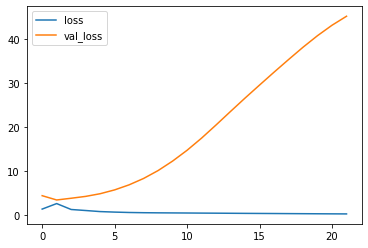

In [222]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], label = 'loss')
plt.plot(history1.history['val_loss'], label ='val_loss')
plt.legend()

In [223]:
y_train_model1_predict = model1.predict(X_train )
y_validation_model1_predict = model1.predict(X_validation )
y_test_model1_predict = model1.predict(X_test)

In [224]:
y_train.shape

(13, 505)

In [225]:
y_train_model1_predict.shape

(13, 505)

In [226]:
y_train_model1_predict[:,1]

array([-0.07657223,  0.84823257,  1.403255  ,  0.3484682 ,  1.2272924 ,
        1.4725177 ,  0.7107862 ,  0.17393707, -0.70778334, -0.47756937,
        0.4339127 ,  0.53425944,  1.8282152 ], dtype=float32)

# Indexing to get stock performance

In [233]:
ticker_list

array(['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'BRK-B',
       'JPM', 'JNJ', 'V', 'NVDA', 'DIS', 'MA', 'PG', 'UNH', 'PYPL', 'HD',
       'BAC', 'INTC', 'NFLX', 'CMCSA', 'XOM', 'VZ', 'ADBE', 'CRM', 'ABT',
       'T', 'CVX', 'KO', 'AVGO', 'CSCO', 'ABBV', 'MRK', 'PFE', 'WMT',
       'PEP', 'TMO', 'NKE', 'TXN', 'ACN', 'LLY', 'MDT', 'QCOM', 'MCD',
       'WFC', 'COST', 'HON', 'NEE', 'C', 'UNP', 'BMY', 'DHR', 'PM',
       'AMGN', 'LIN', 'ORCL', 'SBUX', 'BA', 'CAT', 'LOW', 'RTX', 'GE',
       'UPS', 'MS', 'GS', 'AMAT', 'IBM', 'INTU', 'DE', 'NOW', 'AMD', 'MU',
       'MMM', 'BLK', 'BKNG', 'AMT', 'SCHW', 'TGT', 'CVS', 'AXP', 'ISRG',
       'CHTR', 'FIS', 'LRCX', 'LMT', 'TJX', 'MO', 'SYK', 'TFC', 'GILD',
       'SPGI', 'MDLZ', 'CI', 'CB', 'PLD', 'ANTM', 'ADP', 'PNC', 'ZTS',
       'COP', 'ATVI', 'USB', 'CME', 'BDX', 'CSX', 'TMUS', 'CCI', 'FISV',
       'ILMN', 'EL', 'GM', 'NSC', 'ADSK', 'CL', 'DUK', 'FDX', 'ICE', 'SO',
       'GPN', 'MMC', 'ADI', 'ITW', 'APD', 'D', 'TWTR', 'COF', 

In [234]:
ticker_list[1]

'MSFT'

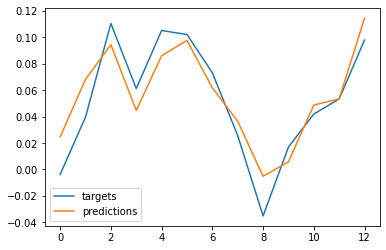

In [228]:
plt.plot(scaler_y.inverse_transform(y_train)[:,1], label = 'targets')
plt.plot(scaler_y.inverse_transform(y_train_model1_predict)[:,1] , label="predictions")
plt.legend()
plt.show()

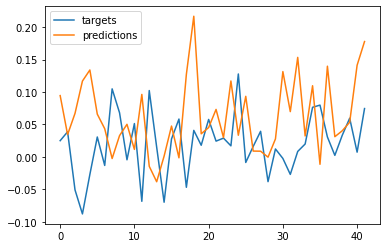

In [229]:
plt.plot(scaler_y.inverse_transform(y_validation)[:,1], label = 'targets')
plt.plot(scaler_y.inverse_transform(y_validation_model1_predict)[:,1] , label="predictions")
plt.legend()
plt.show()

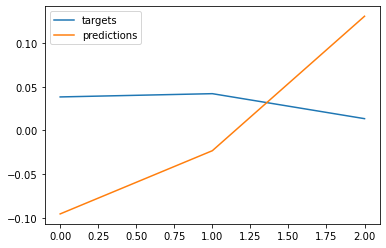

In [232]:
plt.plot(scaler_y.inverse_transform(y_test)[:,1], label = 'targets')
plt.plot(scaler_y.inverse_transform(y_test_model1_predict)[:,1] , label="predictions")
plt.legend()
plt.show()

In [247]:
y_final_model1_predict = scaler_y.inverse_transform(model1.predict(X_final))

# March 2021 Prediction

In [ ]:
# AAPl 

In [252]:
y_final_model1_predict[:,0]

array([-1.28807e+12], dtype=float32)

In [ ]:
# MSFT

In [259]:
y_final_model1_predict[:,5]

array([-8.669834e+11], dtype=float32)

In [ ]:
# TSLA

In [258]:
y_final_model1_predict[:,6]

array([-8.5116815e+12], dtype=float32)

In [253]:
# AMZN

In [254]:
y_final_model1_predict[:,2]

array([1.3610324e+13], dtype=float32)

In [257]:
y_final_model1_predict

array([[-1.28806997e+12, -1.74553917e+12,  1.36103235e+13,
         1.66212521e+12,  6.47402422e+11, -8.66983412e+11,
        -8.51168146e+12,  6.87729908e+12, -8.35349434e+12,
        -8.24547344e+11,  7.06936465e+12, -1.83476704e+13,
         1.26674639e+12,  3.93568505e+12,  1.15353072e+12,
         3.69990697e+12, -9.13918290e+12,  7.67392023e+11,
         6.75256258e+12, -2.43101231e+12, -2.25923380e+12,
         1.11124530e+13,  1.08979644e+12,  5.09662252e+12,
         7.49346016e+12, -7.40360664e+12,  6.68747222e+12,
        -4.56863187e+11,  1.12971775e+13,  4.59389639e+12,
         3.33832782e+12, -5.87964482e+11,  9.71531459e+12,
         8.37703749e+12, -8.73653289e+10,  7.16227582e+12,
         1.15666518e+12,  7.10830352e+12,  5.04865017e+12,
         1.23971555e+12,  5.69913010e+12, -2.02603535e+12,
         1.42680229e+13,  1.93562280e+12,  3.27984611e+12,
         6.29868121e+12,  8.21541418e+12,  7.71206834e+12,
         5.39571152e+12,  6.90785616e+12,  1.07572646e+1